In [1]:
%matplotlib inline
import torch as tc
import torchvision as tv
import torch.utils.data as Data
import matplotlib.pyplot as plt

## Autograd
1. define tensor with "requires_grad=True"
2. write formula
3. call .backward()
Example: gradiant on $B=x^TAx$, $\frac{dB}{dx}=(A+A^T)x$

In [2]:
x = tc.tensor([[1],[2],[3]], requires_grad=True)
A = tc.tensor([[1,2,3],[2,4,4],[3,4,5]])
print(x)
print(A)

tensor([[ 1],
        [ 2],
        [ 3]])
tensor([[ 1,  2,  3],
        [ 2,  4,  4],
        [ 3,  4,  5]])


In [3]:
B = x.t().mm(A).mm(x)
print(B)
# x.grad.zero_()
B.backward()
print(x.grad)
actual_grad = (A+A.t()).mm(x)
print( actual_grad )

tensor([[ 136]])
tensor([[ 28],
        [ 44],
        [ 52]])
tensor([[ 28],
        [ 44],
        [ 52]])


## Logistic regression using pytorch
What do we do:
```python
step 0: load data and parameter

step 1: def forward(X):
            # pass
            return y_pred
step 2: def loss_fn(y_pred, y_target):
            # pass
            return loss
step 3: def update(loss,W_old)：
            # pass:
            return W_new
```
Done!

In [4]:
X = tc.rand([100,5])
y = tc.empty(100, dtype=tc.long).random_(3)
W = tc.rand([5,3],requires_grad=True)

In [5]:
print(X[:10])
print(y[:10])
print(W)

tensor([[ 0.6077,  0.5065,  0.7217,  0.6019,  0.3107],
        [ 0.6881,  0.6758,  0.5778,  0.1460,  0.9403],
        [ 0.0885,  0.5016,  0.4405,  0.4557,  0.8329],
        [ 0.6146,  0.5280,  0.1502,  0.8507,  0.8534],
        [ 0.4453,  0.6853,  0.1063,  0.3200,  0.1786],
        [ 0.0724,  0.9152,  0.0275,  0.9943,  0.0547],
        [ 0.8005,  0.6575,  0.4772,  0.7157,  0.9138],
        [ 0.0318,  0.6873,  0.2280,  0.4942,  0.9803],
        [ 0.2753,  0.0258,  0.4273,  0.2155,  0.7636],
        [ 0.7210,  0.2274,  0.3189,  0.8020,  0.6872]])
tensor([ 2,  2,  0,  1,  2,  2,  1,  0,  1,  2])
tensor([[ 0.5767,  0.0003,  0.3764],
        [ 0.1501,  0.4021,  0.8631],
        [ 0.8687,  0.5672,  0.2082],
        [ 0.3000,  0.9565,  0.4771],
        [ 0.7156,  0.9555,  0.9857]])


__torch.nn__ includes may classes that act like "functions"

In [6]:
logreg_loss_func = tc.nn.CrossEntropyLoss()

Now use his function to calculate the numerial loss

In [7]:
logreg_loss = logreg_loss_func(X.mm(W), y)

The call __.backward()__ to see get the gradiant

In [8]:
#W.grad.zero_()
logreg_loss.backward(retain_graph=True)
grad = W.grad
grad

tensor(1.00000e-02 *
       [[ 2.7252,  1.5970, -4.3222],
        [ 2.3564,  2.5113, -4.8677],
        [ 1.8508,  2.9365, -4.7873],
        [-1.7610,  4.5200, -2.7589],
        [ 1.0130,  0.0583, -1.0713]])

In [9]:
with tc.no_grad():
    lr = 0.01
    W = W + grad * lr
W

tensor([[ 0.5770,  0.0004,  0.3759],
        [ 0.1503,  0.4023,  0.8626],
        [ 0.8689,  0.5675,  0.2077],
        [ 0.2998,  0.9570,  0.4769],
        [ 0.7157,  0.9555,  0.9856]])

Then we update W, we could see all difficult part are done by pytorch
## Encapsulation even more

In [10]:
N, D_in, H, D_out = 64, 1000, 100, 10
x = tc.randn(N, D_in)
y = tc.randn(N, D_out)

In [11]:
forward_fn = tc.nn.Sequential(
    tc.nn.Linear(D_in, H),
    tc.nn.ReLU(),
    tc.nn.Linear(H, D_out),
)
loss_fn = tc.nn.MSELoss(size_average=True)

In [12]:
y_pred = forward_fn(x)
loss = loss_fn(y_pred, y)
loss

tensor(1.0670)

In [16]:
learning_rate = 1e-4
for t in range(500):
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = forward_fn(x)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    print(t, loss.item())

    # Zero the gradients before running the backward pass.
    forward_fn.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with tc.no_grad():
        for param in forward_fn.parameters():
            param -= learning_rate * param.grad

0 1.067003607749939
1 1.0668734312057495
2 1.066742181777954
3 1.0666124820709229
4 1.0664807558059692
5 1.0663511753082275
6 1.0662205219268799
7 1.0660898685455322
8 1.065960168838501
9 1.0658293962478638
10 1.0656994581222534
11 1.065568208694458
12 1.065439224243164
13 1.065308690071106
14 1.0651781558990479
15 1.0650476217269897
16 1.0649176836013794
17 1.0647869110107422
18 1.0646580457687378
19 1.0645275115966797
20 1.064396619796753
21 1.0642671585083008
22 1.064137578010559
23 1.0640074014663696
24 1.0638773441314697
25 1.0637468099594116
26 1.06361722946167
27 1.0634886026382446
28 1.063357949256897
29 1.0632283687591553
30 1.0630995035171509
31 1.0629692077636719
32 1.0628385543823242
33 1.062709093093872
34 1.062578558921814
35 1.062449336051941
36 1.062320351600647
37 1.0621904134750366
38 1.0620611906051636
39 1.061930775642395
40 1.0618013143539429
41 1.0616724491119385
42 1.0615429878234863
43 1.0614131689071655
44 1.061283826828003
45 1.061154842376709
46 1.06102490425

385 1.0188593864440918
386 1.018740177154541
387 1.018620252609253
388 1.0185012817382812
389 1.0183818340301514
390 1.018262505531311
391 1.0181429386138916
392 1.0180236101150513
393 1.0179040431976318
394 1.0177847146987915
395 1.0176644325256348
396 1.0175449848175049
397 1.017426609992981
398 1.017307996749878
399 1.017187237739563
400 1.0170689821243286
401 1.016948938369751
402 1.0168300867080688
403 1.0167112350463867
404 1.016592025756836
405 1.0164722204208374
406 1.0163538455963135
407 1.0162348747253418
408 1.016115427017212
409 1.0159969329833984
410 1.0158777236938477
411 1.015760064125061
412 1.0156406164169312
413 1.0155225992202759
414 1.0154035091400146
415 1.0152848958969116
416 1.0151667594909668
417 1.0150482654571533
418 1.014930009841919
419 1.0148112773895264
420 1.0146929025650024
421 1.014574408531189
422 1.0144556760787964
423 1.0143373012542725
424 1.0142195224761963
425 1.0141007900238037
426 1.0139825344085693
427 1.0138651132583618
428 1.0137463808059692


Using __torch.optim__ to simplify the result, the training above is equivalent to:

In [18]:
learning_rate = 1e-4
optimizer = tc.optim.Adam(forward_fn.parameters(), lr=learning_rate)
for t in range(500):
    y_pred = forward_fn(x)
    loss = loss_fn(y_pred, y)
    print(t, loss.item())
    optimizer.zero_grad()
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()

0 1.0052906274795532
1 0.9796911478042603
2 0.9547818899154663
3 0.9306782484054565
4 0.9072775840759277
5 0.8845944404602051
6 0.8626068830490112
7 0.8413504362106323
8 0.8205755352973938
9 0.8003190159797668
10 0.7806328535079956
11 0.7614113092422485
12 0.7427704930305481
13 0.7247215509414673
14 0.7072141766548157
15 0.6902074217796326
16 0.6735973954200745
17 0.6574391722679138
18 0.6417974233627319
19 0.626603364944458
20 0.6118294596672058
21 0.5973835587501526
22 0.5833657383918762
23 0.5696368217468262
24 0.5561829805374146
25 0.543042004108429
26 0.5301986932754517
27 0.5176398158073425
28 0.5053831934928894
29 0.49341195821762085
30 0.4816928803920746
31 0.4702206254005432
32 0.4590657651424408
33 0.4481775760650635
34 0.4375523626804352
35 0.4271828234195709
36 0.41702190041542053
37 0.4070528447628021
38 0.39730626344680786
39 0.3877413868904114
40 0.3783687949180603
41 0.3692431151866913
42 0.3603104054927826
43 0.3515719175338745
44 0.3430081605911255
45 0.33460262417793

345 4.0386194655184227e-07
346 3.8299353377624357e-07
347 3.631950562521524e-07
348 3.4440910212651943e-07
349 3.265858481427131e-07
350 3.096645571076806e-07
351 2.9363314979491406e-07
352 2.78393201824656e-07
353 2.639428657857934e-07
354 2.502384006675129e-07
355 2.3723104902728664e-07
356 2.24904624701594e-07
357 2.1320367693533626e-07
358 2.020963165705325e-07
359 1.9156041730639117e-07
360 1.8157513181904505e-07
361 1.7209465852374706e-07
362 1.6310953299125686e-07
363 1.545854075857278e-07
364 1.4649080526396574e-07
365 1.3882382177143882e-07
366 1.3155131739495118e-07
367 1.2464536780498747e-07
368 1.1810294608949334e-07
369 1.118939039201905e-07
370 1.0601259248232964e-07
371 1.0042350595540483e-07
372 9.513381371561991e-08
373 9.011549906290384e-08
374 8.536104445511228e-08
375 8.084916913730922e-08
376 7.657357059542846e-08
377 7.25156823477846e-08
378 6.867001189903021e-08
379 6.502632743377035e-08
380 6.157085863378597e-08
381 5.8300162919522336e-08
382 5.519601131709351e-

## Training  CNN on MNIST
Step 0: load data set

In [181]:
def load_data():
    train_data = tv.datasets.MNIST(root='.data/mnist', train=True,
                                            transform=tv.transforms.ToTensor(),
                                            download=True)
    test_data = tv.datasets.MNIST(root='.data/mnist', train=False,
                                            transform=tv.transforms.ToTensor(),
                                            download=True)
    return train_data, test_data

def imshow(instance, label):
    plt.imshow(instance.reshape(28,28), cmap='gray')
    plt.title('%i' % label, fontsize = 20)
    plt.show()

train_data, test_data = load_data()
X_test = test_data.test_data.reshape(10000,1,28,28)
X_test = tc.tensor(X_test,dtype=tc.float) / 255
y_test = test_data.test_labels
import torch.utils.data as Data
train_batch = Data.DataLoader(dataset=train_data, batch_size=100,shuffle=True)

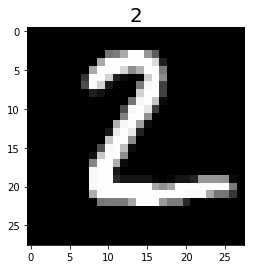

In [158]:
imshow(X_test[1], y_test[1])

Step 1: define forward function

    layer 1: Convolutional + Relu + Maxpooling
    layer 2: Convolutional + Relu + Maxpooling
    layer 3: linear
    
reference:
Conv2d:https://pytorch.org/docs/stable/nn.html?highlight=conv#torch.nn.functional.conv2d
    


In [159]:
nn = tc.nn
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1_conv = nn.Sequential(  # input shape (1, 28, 28)
            nn.Conv2d(
                in_channels=1,      # input height
                out_channels=16,    # n_filters
                kernel_size=5,      # filter size
                stride=1,           # filter movement/step
                padding=2,      # 如果想要 con2d 出来的图片长宽没有变化, padding=(kernel_size-1)/2 当 stride=1
            ),      # output shape (16, 28, 28)
            nn.ReLU(),    # activation
            nn.MaxPool2d(kernel_size=2),    # 在 2x2 空间里向下采样, output shape (16, 14, 14)
        )
        self.layer2_conv = nn.Sequential(  # input shape (1, 28, 28)
            nn.Conv2d(16, 32, 5, 1, 2),  # output shape (32, 14, 14)
            nn.ReLU(),  # activation
            nn.MaxPool2d(2),  # output shape (32, 7, 7)
        )
        self.layer3_linear = nn.Linear(32 * 7 * 7, 10)   # fully connected layer, output 10 classes
        
    def forward(self, x):
        x = self.layer1_conv(x)
        x = self.layer2_conv(x)
        x = x.view(x.size(0), -1)   # 展平多维的卷积图成 (batch_size, 32 * 7 * 7)
        output = self.layer3_linear(x)
        return output

Step 2: define loss

cross entropy:
    https://pytorch.org/docs/stable/nn.html?highlight=cross%20entropy#torch.nn.functional.cross_entropy

In [160]:
loss_func = nn.CrossEntropyLoss()

Step 3: train!

In [161]:
cnn_mnist = CNN()
optimizer = tc.optim.Adam(cnn_mnist.parameters(), lr=0.001)

During training, several consideration are needed:
1. how many round? how big is the batch each time?
```
    for each_round in epoch:
        for each_example in  example:
```
2. what about testing set?
3. what about logging?

In [184]:
for epoch in range(1):
    for step, (x, y) in enumerate(train_batch):
        output = cnn_mnist(x)
        loss = loss_func(output, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
 
        if step % 100 == 0:
            outputs = cnn_mnist(X_test)
            _, predicted = tc.max(outputs.data, 1)
            total = y_test.size(0)
            correct = (predicted == y_test).sum().item()
            accuracy = correct/total
            print('Epoch:', epoch, '|Step:', step,
                  '|train loss:%.4f' % loss.data[0], '|test accuracy:%.4f' % accuracy)

/home/henryliu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  app.launch_new_instance()


Epoch: 0 |Step: 0 |train loss:0.2894 |test accuracy:0.9457
Epoch: 0 |Step: 100 |train loss:0.1667 |test accuracy:0.9614
Epoch: 0 |Step: 200 |train loss:0.2264 |test accuracy:0.9697
Epoch: 0 |Step: 300 |train loss:0.0412 |test accuracy:0.9761
Epoch: 0 |Step: 400 |train loss:0.0852 |test accuracy:0.9791
Epoch: 0 |Step: 500 |train loss:0.0337 |test accuracy:0.9803
Epoch: 1 |Step: 0 |train loss:0.0611 |test accuracy:0.9810
Epoch: 1 |Step: 100 |train loss:0.0260 |test accuracy:0.9812


KeyboardInterrupt: 